In [2]:
from google.colab import drive
drive.mount('/content/drive')
import sys
# sys.path.insert(0, '/content/drive/MyDrive/FL2022/FedAVG/Results')
sys.path.insert(0, '/content/drive/MyDrive/Colab_Notebooks/FL2022/FedAVG/Results')

Mounted at /content/drive


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
%matplotlib inline

In [5]:
import os
# os.chdir("/content/drive/MyDrive/FL2022/FedAVG/Results")
os.chdir('/content/drive/MyDrive/Colab_Notebooks/FL2022/FedAVG/Results')

In [6]:
iidBN=pd.read_csv("fedAVG_['iid']_['balanced']_batch_norm[10]_100_lr_0.0001_optimizer_adam.csv")
non_iid_bBN=pd.read_csv("fedAVG_['nonIID']_['balanced']_batch_norm[10]_100_lr_0.0001_optimizer_adam.csv")
non_iid_uBN=pd.read_csv("fedAVG_['nonIID']_['unbalanced']_batch_norm[10]_100_lr_0.0001_optimizer_adam.csv")

iidGN=pd.read_csv("fedAVG_['iid']_['balanced']_group_norm['']_100_lr_0.0001_optimizer_sgd.csv")
non_iid_bGN=pd.read_csv("fedAVG_['nonIID']_['balanced']_group_norm['']_100_lr_0.001_optimizer_sgd.csv")
non_iid_uGN=pd.read_csv("fedAVG_['nonIID']_['unbalanced']_group_norm['']_100_lr_0.001_optimizer_sgd.csv")

In [7]:
iidBN.head()

,Unnamed: 0,train_acc,train_loss
0,0,0.1012,2.386791
1,1,0.1210,2.290899
2,2,0.1830,2.211064
3,3,0.2120,2.173910
4,4,0.2134,2.146324


In [8]:
epochs=np.linspace(1,100, 100)

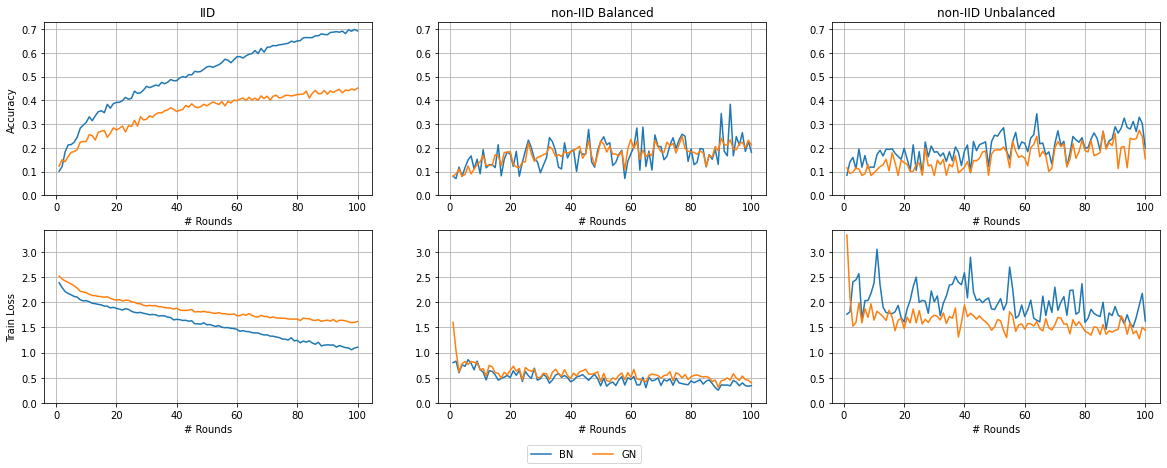

In [13]:
fig, ax = plt.subplots(2, 3, figsize=(20, 7))


ax[0][0].plot(epochs, iidBN['train_acc'],  label='BN')
ax[0][0].plot(epochs, iidGN['train_acc'],  label='GN')
ax[0][0].set_title("IID")
ax[0][0].set_ylabel('Accuracy')
ax[0][0].set_xlabel('# Rounds')
ax[0][0].grid()

ax[0][1].plot(epochs, non_iid_bBN['train_acc'], label='BN')
ax[0][1].plot(epochs, non_iid_bGN['train_acc'],  label='GN')
ax[0][1].set_title("non-IID Balanced")
ax[0][1].set_xlabel('# Rounds')
ax[0][1].grid()

ax[0][2].plot(epochs, non_iid_uBN['train_acc'],  label='BN')
ax[0][2].plot(epochs, non_iid_uGN['train_acc'],  label='GN')
ax[0][2].set_title("non-IID Unbalanced")
ax[0][2].set_xlabel('# Rounds')
ax[0][2].grid()



ax[1][0].plot(epochs, iidBN['train_loss'],  label='BN')
ax[1][0].plot(epochs, iidGN['train_loss'],  label='GN')
ax[1][0].set_ylabel('Train Loss')
ax[1][0].set_xlabel('# Rounds')
ax[1][0].grid()



ax[1][1].plot(epochs, non_iid_bBN['train_loss'],  label='BN')
ax[1][1].plot(epochs, non_iid_bGN['train_loss'],  label='GN')
ax[1][1].set_xlabel('# Rounds')
ax[1][1].grid()



ax[1][2].plot(epochs, non_iid_uBN['train_loss'],  label='BN')
ax[1][2].plot(epochs, non_iid_uGN['train_loss'],  label='GN')
ax[1][2].set_xlabel('# Rounds')
ax[1][2].grid()

ymax0 = max([axi.get_ylim()[1] for axi in ax[0]])
for axi in ax[0]:
    axi.set_ylim(0, ymax0)

ymax1 = max([axi.get_ylim()[1] for axi in ax[1]])
for axi in ax[1]:
    axi.set_ylim(0, ymax1)

legendEntries = ("BN","GN")
# set figure legend entries, number of columns, location
fig.legend(legendEntries,ncol=len(legendEntries),loc="lower center")
#plt.xlabel('Epoch')

plt.show()
